In [63]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import unicodedata
from sklearn import metrics
import matplotlib.pyplot as plt

In [99]:
dataset = pd.read_csv(r"C:\\Users\\user\\Project_Research_Topic\\600 news with valid hoax label.csv", sep=';')

In [100]:
dataset

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid
...,...,...
595,Kabar yang beredar seputar rencana kenaikan ga...,Valid
596,Kabar yang beredar seputar rencana kenaikan ga...,Valid
597,"Akhir-akhir ini, beredar pemberitaan yang meny...",Valid
598,Rancangan peraturan pemerintah (RPP) tentang G...,Valid


In [101]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
corpus = []

In [103]:
for i in range(len(dataset)):
    text = re.sub('[^a-zA-Z]','',dataset['berita'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = ','.join(text)
    corpus.append(text)

In [104]:
corpus[:5]

['jakartadijejaringsosialbanyakberedarinformasiyangmenyebutlelesebagaiikanpalingjorokdalamsesuapdagingikanleleterkandungselkankerbenarkahjulukansebagaiikanpalingjorokmerujukpadasifatleleyangdoyanmengonsumsisegalajenislimbahdiperairanbahkansebuahartikelyangcukupviraldiinternetmenyebutkankotoranmanusiajugadijadikanpakanpadasebuahbudidayaleledikotahaikouchinasementaraitudihabitataslinyaleleataucatfishjugadikenalsebagaispesiesikanyangsangattangguhikaninidilengkapialatpernapasantambahanberupalabirinsehinggamampubertahanhidupdalamkondisiperairanberlumpurataubahkantercemaragaknyafaktainilahyangmemunculkandugaansoalakumulasiracunkarsinogenpenyebabkankerditubuhikanleleuntungnyaikanleleyangberedardipasaranbukanberasaldarialamliarlelebanyakdibudidayakandikolamkolamyangmestinyabisadikendalikanagarbebasdaripencemaranpakanyangdiberikanjugabisadipilihtidakharusmengandalkanlimbahyangpastipopularitasikanbersungutinitidakpernahpudarbahkanterusmeningkatdatakementeriankelautandanperikanankkpmenyebutproduk

In [105]:
# creating bag of words
cv = CountVectorizer(max_features = 1500)

In [106]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values

In [107]:
# splitting the dataset into 70% training set and 30% test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Fitting Naive Bayes to the Training set 

In [108]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import BernoulliNB

In [109]:
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [110]:
classifier.score(x_train, y_train)

0.6261904761904762

In [111]:
# predicting test set results
y_pred = classifier.predict(x_test)

In [112]:
classifier.score(x_test, y_test)

0.6055555555555555

In [113]:
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 180 points : 71


In [114]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm

array([[0., 1.],
       [0., 1.]])

In [115]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Hoax      0.000     0.000     0.000        71
       Valid      0.606     1.000     0.754       109

    accuracy                          0.606       180
   macro avg      0.303     0.500     0.377       180
weighted avg      0.367     0.606     0.457       180



C:\Users\user\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


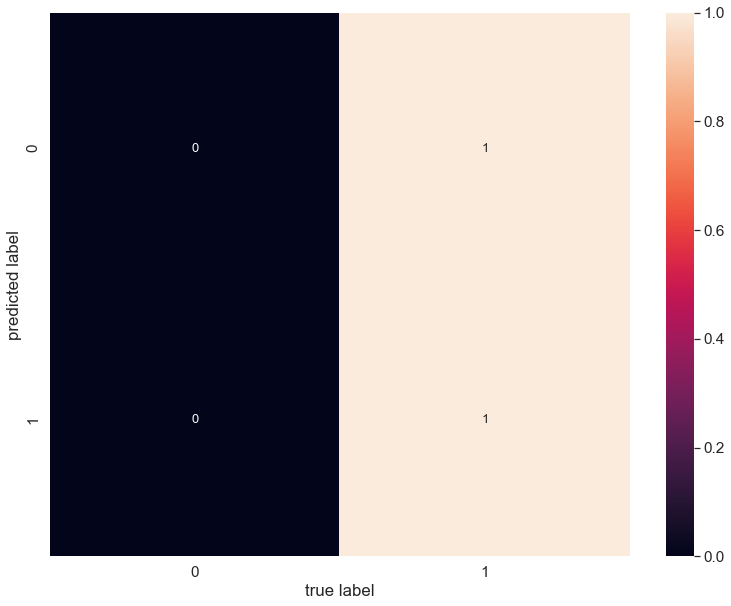

In [125]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(13,10))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 13}) # font size
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Comparing it with MultiNomial Naive Bayes

In [126]:
# comparing it with multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier_2 = MultinomialNB()
classifier_2.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [127]:
classifier_2.score(x_train, y_train)

1.0

In [128]:
# predicting test set results
y_pred_2 = classifier_2.predict(x_test)

In [129]:
classifier_2.score(x_test, y_test)

0.6222222222222222

In [130]:
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred_2).sum()))

Number of mislabeled points out of a total 180 points : 68


In [131]:
cm = metrics.confusion_matrix(y_test, y_pred_2, normalize="true")
cm

array([[0.04225352, 0.95774648],
       [0.        , 1.        ]])

In [132]:
print(metrics.classification_report(y_test, y_pred_2, digits=3))

              precision    recall  f1-score   support

        Hoax      1.000     0.042     0.081        71
       Valid      0.616     1.000     0.762       109

    accuracy                          0.622       180
   macro avg      0.808     0.521     0.422       180
weighted avg      0.767     0.622     0.494       180



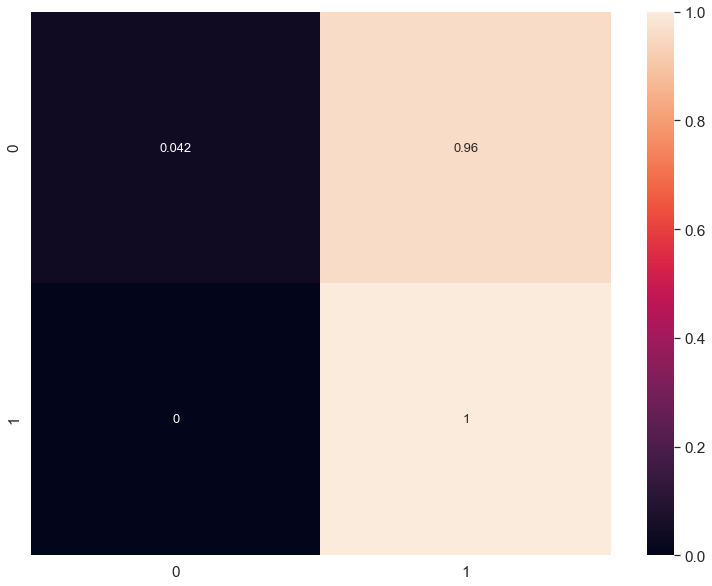

In [133]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(13,10))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 13}) # font size

plt.show()